In [54]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.decomposition import PCA
import numpy as np

N_DENSE = 2
L=8

In [55]:
user = 1
if user == 1:
    prefix_s3 = "/home/owen/"
    prefix_data = "/home/owen/repos/"
elif user == 2:
    prefix_data = "/Users/omyers/repos/"

In [57]:
df_bins = pd.read_csv("{prefix_data}z3support/data/SpinMLData/2DIsing/L-{L}/L-{L}-T-1-5/bins_L-{L}-T-1-5.txt".format(L=L,prefix_data=prefix_data), sep="\t")
df_conf = pd.read_csv("{prefix_data}z3support/data/SpinMLData/2DIsing/L-{L}/L-{L}-T-1-5/spinConfigs_L-{L}-T-1-5.txt".format(L=L,prefix_data=prefix_data), delimiter=r"\s+", header=None)

In [4]:
df_bins

,# L,T,binNum,E,ESq,AccRate_local,AccRate_clust,sigma,absSigma
0,8,1,1,-1.997375,3.989828125,0.0007203125,1,0.05003125,0.99934375
1,8,1,2,-1.998,3.9922734375,0.00071953125,1,0.03378125,0.99946875
2,8,1,3,-1.996,3.9845625,0.0007496875,1,-0.03578125,0.99896875
3,8,1,4,-1.9974375,3.99008203125,0.00073109375,1,-0.09196875,0.99934375
4,8,1,5,-1.9974375,3.99008203125,0.0007084375,1,0.08396875,0.99934375
...,...,...,...,...,...,...,...,...,...
4999,8,5,996,-0.435125,0.2342109375,0.6916240625,1,0.012375,0.1696875
5000,8,5,997,-0.4463125,0.23892578125,0.6923890625,1,0.02065625,0.17459375
5001,8,5,998,-0.431,0.2245078125,0.69159796875,1,-0.00934375,0.16890625
5002,8,5,999,-0.42225,0.21940625,0.69218546875,1,-0.004875,0.1698125


In [5]:
df_bins.iloc[1000][1]

' T '

In [6]:
df_bins = df_bins[df_bins[' T '] != ' T ']

In [58]:
df_bins = df_bins.astype(
    {
        " T ": int,
        " binNum": int,
    }
)

ValueError: invalid literal for int() with base 10: ' T '

In [8]:
df_conf

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,-1,-1,-1,-1,-1,1,-1,1,1
4996,1,1,1,-1,-1,1,1,1,1,1,...,-1,1,1,1,-1,-1,1,1,1,1
4997,1,1,-1,-1,1,1,-1,-1,-1,-1,...,1,-1,1,-1,-1,-1,-1,1,-1,-1
4998,1,-1,1,1,1,-1,1,-1,1,-1,...,1,1,1,-1,1,1,-1,-1,-1,-1


## Get the temp and magnatization into the configuration dataframe

In [9]:
df_conf["T"] = df_bins[" T "]

In [10]:
df_conf.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63, 'T'],
      dtype='object')

In [11]:
mean_col = df_conf[0].copy()
for i in range(1, L):
    mean_col += df_conf[i]

mean_col /= L

In [12]:
df_conf["M"] = mean_col

In [13]:
#filterned_confs = df_conf[(df_conf["T"] < 1.5) | (df_conf["T"] > 4.5)]
filterned_confs = df_conf

In [14]:
filterned_confs.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,T,M
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1.0,-1.0
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1.0,-1.0
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1.0,-1.0
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1.0,-1.0
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1.0,-1.0


In [15]:
img_pca = PCA(n_components=N_DENSE)

In [16]:
img_pca.fit(filterned_confs.drop(["T","M"], axis=1).sample(frac=1))

PCA(n_components=2)

In [17]:
components = img_pca.transform(filterned_confs.drop(["T","M"], axis=1))

In [18]:
components.shape

(5000, 2)

In [19]:
filterned_confs["T"]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4995    5.0
4996    5.0
4997    5.0
4998    5.0
4999    5.0
Name: T, Length: 5000, dtype: float64

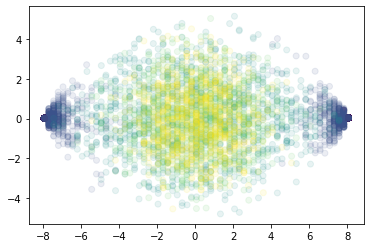

In [20]:
plt.scatter(components[:,0], components[:,1], c=pd.to_numeric(filterned_confs["T"]), alpha=0.1)

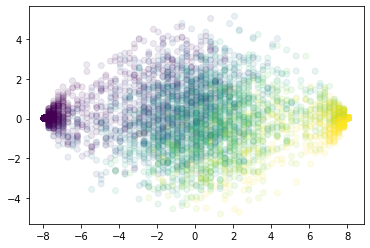

In [21]:
plt.scatter(components[:,0], components[:,1], c=pd.to_numeric(filterned_confs["M"]), alpha=0.1)

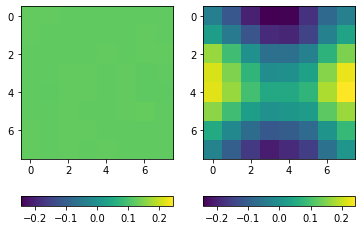

In [53]:
vmax = 0.0
vmin = 0.0
for i in range(N_DENSE):
    if max(img_pca.components_[i]) > vmax:
        vmax = max(img_pca.components_[i])
    
    if min(img_pca.components_[i]) < vmin:
        vmin = min(img_pca.components_[i])
        

fig_pca, (axes_pca, ax_color) = plt.subplots(2,N_DENSE, gridspec_kw={"height_ratios":[1, 0.05]})
im_list = []
for i, ax in enumerate(axes_pca.flat):
    im = ax.imshow(img_pca.components_[i].reshape(L,L), vmin=vmin, vmax=vmax)
    im_list.append(im)

for i, ax in enumerate(ax_color.flat):
    fig_pca.colorbar(im_list[i], cax=ax, orientation="horizontal")
plt.savefig("{}/s3-bucket/ising/pca_weights_as_image_l{}".format(prefix_s3, L))

In [23]:
df_components = pd.DataFrame(data={"c0": components[:,0], "c1": components[:,1], "T": pd.to_numeric(filterned_confs["T"])})

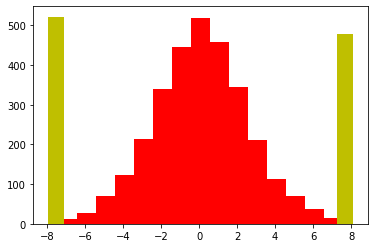

In [24]:
component_number = 0
plt.hist(df_components[df_components["T"] > 2]["c{}".format(component_number)], bins=15, color="r")
plt.hist(df_components[df_components["T"] < 2]["c{}".format(component_number)], bins=20, color="y")
#plt.show()
plt.savefig("{}/s3-bucket/reproduction/fig_2/pca_latent_param_hist_l{}.png".format(prefix_s3, L))

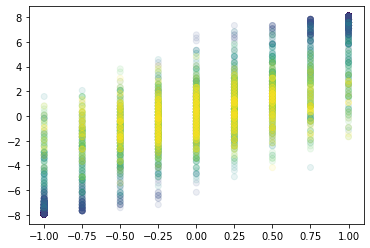

In [25]:
plt.scatter(pd.to_numeric(filterned_confs["M"]), components[:,0], c=pd.to_numeric(filterned_confs["T"]), alpha=0.1)

# Simple Autoencoder

In [26]:
simp_ae = tf.keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=(L*L,)),
        keras.layers.Dense(N_DENSE, use_bias=False, name='latent_space'),
        keras.layers.Dense(L*L),
    ]
)


2022-05-09 20:24:11.872988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 20:24:11.876282: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 20:24:11.876532: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 20:24:11.877145: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [27]:
simp_ae.output_shape

(None, 64)

In [28]:
simp_ae.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
latent_space (Dense)         (None, 2)                 128       
_________________________________________________________________
dense (Dense)                (None, 64)                192       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [29]:
tb_callback = keras.callbacks.TensorBoard(
    log_dir='tb_log_dir_notebook',
    histogram_freq=2,  
    write_graph=True,
    write_images=True
)

2022-05-09 20:24:12.235871: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-09 20:24:12.235889: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-05-09 20:24:12.235926: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-05-09 20:24:12.236136: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory
2022-05-09 20:24:12.326922: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-09 20:24:12.327060: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [30]:
simp_ae.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [31]:
simp_ae.fit(
    batch_size=16,
    x=filterned_confs.drop(["T","M"], axis=1),
    y=filterned_confs.drop(["T","M"], axis=1),
    epochs=100,
    callbacks=[tb_callback]
)

2022-05-09 20:24:12.497484: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
  2/313 [..............................] - ETA: 28s - loss: 1.1922 - mae: 1.0248 

2022-05-09 20:24:12.834529: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-09 20:24:12.834546: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-05-09 20:24:12.921549: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-05-09 20:24:12.921671: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


183/313 [================>.............] - ETA: 0s - loss: 1.0040 - mae: 0.9635

2022-05-09 20:24:13.040599: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 62 callback api events and 59 activity events. 
2022-05-09 20:24:13.041675: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-09 20:24:13.043326: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tb_log_dir_notebook/train/plugins/profile/2022_05_09_20_24_13

2022-05-09 20:24:13.044233: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to tb_log_dir_notebook/train/plugins/profile/2022_05_09_20_24_13/owen-PRIME-Z390-A.trace.json.gz
2022-05-09 20:24:13.047180: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: tb_log_dir_notebook/train/plugins/profile/2022_05_09_20_24_13

2022-05-09 20:24:13.047550: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to tb_log_dir_not

313/313 [==============================] - 1s 2ms/step - loss: 0.8631 - mae: 0.8461
Epoch 2/100
313/313 [==============================] - 0s 813us/step - loss: 0.5764 - mae: 0.5777
Epoch 3/100
313/313 [==============================] - 0s 838us/step - loss: 0.5648 - mae: 0.5698
Epoch 4/100
313/313 [==============================] - 0s 837us/step - loss: 0.5577 - mae: 0.5639
Epoch 5/100
313/313 [==============================] - 0s 835us/step - loss: 0.5535 - mae: 0.5597
Epoch 6/100
313/313 [==============================] - 0s 832us/step - loss: 0.5515 - mae: 0.5575
Epoch 7/100
313/313 [==============================] - 0s 817us/step - loss: 0.5506 - mae: 0.5567
Epoch 8/100
313/313 [==============================] - 0s 865us/step - loss: 0.5503 - mae: 0.5566
Epoch 9/100
313/313 [==============================] - 0s 804us/step - loss: 0.5501 - mae: 0.5566
Epoch 10/100
313/313 [==============================] - 0s 796us/step - loss: 0.5500 - mae: 0.5566
Epoch 11/100
313/313 [===========

In [32]:
mid_layer = simp_ae.get_layer('latent_space')

In [33]:
mid_layer.get_weights()[0].shape

(64, 2)

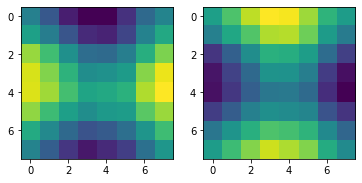

In [34]:
fig, axes = plt.subplots(1,N_DENSE)
for i, ax in enumerate(axes.flat):
    ax.imshow(mid_layer.get_weights()[0][:,-(i+1)].reshape(L,L))

In [35]:
full_latent_out = simp_ae.predict(filterned_confs.drop(["T","M"], axis=1))

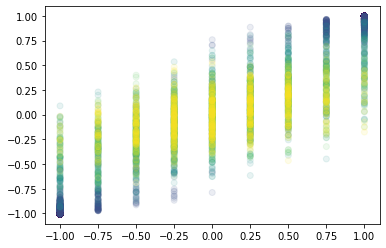

In [36]:
plt.scatter(pd.to_numeric(filterned_confs["M"]), full_latent_out[:,0], c=pd.to_numeric(filterned_confs["T"]), alpha=0.1)

# Simple Autoencoder with Reshape

In [37]:
simp_ae = tf.keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=(L, L, 1)),
        keras.layers.Flatten(),
        keras.layers.Dense(N_DENSE, use_bias=False, name='latent_space'),
        keras.layers.Dense(units=L*L),
        keras.layers.Reshape(target_shape=(L, L, 1))
    ]
)

# Fig 2.c

In [38]:
filterned_confs["latent_1"] = full_latent_out[:,0]

In [39]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [40]:
filterned_confs.to_sql('filtered_confs', con=engine, if_exists='append')

In [41]:
avg_m_out = engine.execute(
"""
    select 
        t,
        avg(abs(m)),
        avg(abs(latent_1))
    from filtered_confs
    group by t
""").fetchall()

In [42]:
avg_m_out[1:]

[(1.0, 0.99925, 1.0006277941465378),
 (2.0, 0.90925, 0.9092775726392865),
 (3.0, 0.49, 0.3508006064360961),
 (4.0, 0.3975, 0.21678654276533052),
 (5.0, 0.3463855421686747, 0.17026152201656095)]

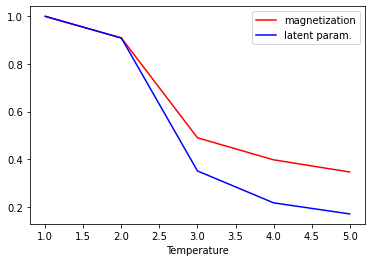

In [43]:
plt.plot(
    [i[0] for i in avg_m_out[1:]],
    [i[1] for i in avg_m_out[1:]],
    c='r',
    label="magnetization"
)
plt.plot(
    [i[0] for i in avg_m_out[1:]],
    [i[2] for i in avg_m_out[1:]],
    c='b',
    label="latent param."
)
plt.xlabel("Temperature")
plt.legend()
plt.savefig("{}/s3-bucket/reproduction/fig_2/pca_magnitization_and_latent_param_vs_temp_l{}.png".format(prefix_s3, L))

# Look into this

In [44]:
#engine.execute(
#"""
#    select 
#    m
#    from filterned_confs
#    where t is null
#""").fetchall()